In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

params

In [2]:
file_path = 'results/evaluation.json'  # Path to the results file
model_name = 'gpt-4'                   # Model name, e.g., 'gpt-4'
scoring_template = 'scoring_1_10'      # Scoring template

read data

In [3]:
with open(file_path, 'r') as file:
    json = json.load(file)

eval_data = json[model_name][scoring_template]

misspelled_percentages = []
scores = []

for item in eval_data:
    misspelled_percentages.append(item["misspelled_percentage"])
    score = int(item["response"].split(":")[1].strip())
    scores.append(score)

visualize

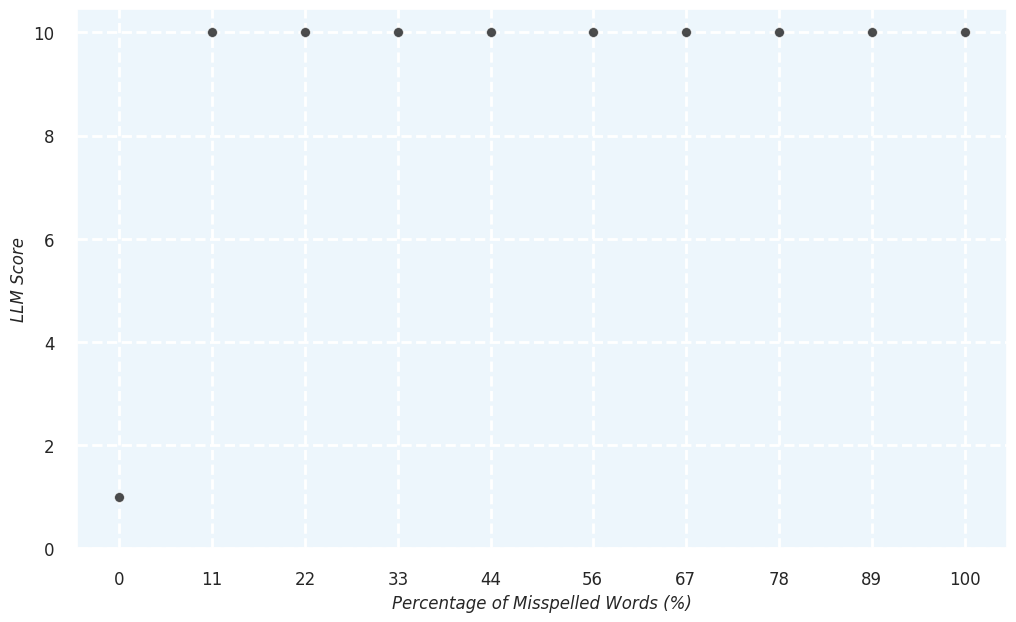

In [41]:
sns.set(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 7))

sns.set(rc={'axes.facecolor':'#edf6fc'})
ax = sns.scatterplot(x=misspelled_percentages, y=scores, s=50, color="black", alpha=0.7)

plt.xlabel('Percentage of Misspelled Words (%)', fontsize=12, style='italic')
plt.ylabel('LLM Score', fontsize=12, style='italic')

plt.xticks([0, 11, 22, 33, 44, 56, 67, 78, 89, 100], fontsize=12)
plt.yticks([0, 2, 4, 6, 8, 10], fontsize=12)

ax.tick_params(axis='both', which='major', pad=10)

plt.grid(True, linestyle='--', linewidth=2, alpha=1)

plt.savefig(f"figures/{model_name}_{scoring_template}.png")